<a href="https://colab.research.google.com/github/waleedGeorgy/deep-learning/blob/main/Natural_Language_Processing_(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# spaCy basics

[spaCy](https://spacy.io/) is an open-source software library for advanced natural language processing, written in Python.

In [ ]:
# importing spacy
import spacy

In [ ]:
# Loading the NLP model
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Creating a doc object by applying our loaded model to the string
doc = nlp('There are almost 8 billion people in the world!')

In [ ]:
# Getting the tokens (words) from the string, and printing additional info
# token.pos_ shows parts-of-speech
# token.dep_ shows the syntactic dependancy
for token in doc:
  print(token.text, '-'*5, token.pos_, '-'*5, token.dep_)

There ----- PRON ----- expl
are ----- VERB ----- ROOT
almost ----- ADV ----- advmod
8 ----- NUM ----- compound
billion ----- NUM ----- nummod
people ----- NOUN ----- attr
in ----- ADP ----- prep
the ----- DET ----- det
world ----- NOUN ----- pobj
! ----- PUNCT ----- punct


In [ ]:
# Checking the loaded nlp pipeline
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7a9b3dc9ea40>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7a9b3dc9ff40>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7a9b3c2eb1b0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7a9b3da88300>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7a9b3dac2940>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7a9b3c2ebae0>)]

More details about spaCy pipeline - https://spacy.io/usage/processing-pipelines

In [ ]:
# Getting only the names of the processes inside the pipeline
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

Working with larger docs can be hard. So it's a good idea to take a span from the doc and work with it seperatly

In [ ]:
doc2 = nlp('The fish listened intently to what the frogs had to say. We have young kids who often walk into our room at night for various reasons including clowns in the closet. I caught my squirrel rustling through my gym bag. Happiness can be found in the depths of chocolate pudding. The golden retriever loved the fireworks each Fourth of July.')

In [ ]:
random_span = doc2[10:20]
random_span

say. We have young kids who often walk into

In [ ]:
type(doc2)

spacy.tokens.doc.Doc

In [ ]:
type(random_span)

spacy.tokens.span.Span

In [ ]:
# Dissecting the document into sentences
for sentence in doc2.sents:
  print(sentence)

The fish listened intently to what the frogs had to say.
We have young kids who often walk into our room at night for various reasons including clowns in the closet.
I caught my squirrel rustling through my gym bag.
Happiness can be found in the depths of chocolate pudding.
The golden retriever loved the fireworks each Fourth of July.


In [ ]:
# Checking if token at position 12 is a start of the sentence
doc2[12].is_sent_start

True

In [ ]:
doc2[13].is_sent_start

False

## Tokenization

Tokenization is the process of breaking-up the original text into components (tokens).
Tokens are the basic building blocks of the doc object that helps us and the machine understand the meaning of the text and the relationship between words.

In [ ]:
mystring = '"We\'re here to help! Please e-mail us at support@company.com, or visit our site: https://www.ourcompany.com!"'
print(mystring)

"We're here to help! Please e-mail us at support@company.com, or visit our site: https://www.ourcompany.com!"


In [ ]:
doc_mystring = nlp(mystring)

for t in doc_mystring:
  print(t)

"
We
're
here
to
help
!
Please
e
-
mail
us
at
support@company.com
,
or
visit
our
site
:
https://www.ourcompany.com
!
"


In [ ]:
# Token indexing
doc_mystring[5]

help

In [ ]:
# Token span
doc_mystring[2:10]

're here to help! Please e-

In [ ]:
# Spacy can recognize named entities
my_string2 = nlp(u'Apple will build a Moscow factory for $9.5 millions.')

for token in my_string2:
  print(token, end = ' | ')

Apple | will | build | a | Moscow | factory | for | $ | 9.5 | millions | . | 

In [ ]:
for entity in my_string2.ents:
  print(entity)
  print(entity.label_)
  print(spacy.explain(entity.label_))
  print('\n')

Apple
ORG
Companies, agencies, institutions, etc.


Moscow
GPE
Countries, cities, states


$9.5 millions
MONEY
Monetary values, including unit




In [ ]:
# spaCy can recognize noun chunks
my_string3 = nlp('Black cars drive on the busy highway on a cloudy night')

for chunck in my_string3.noun_chunks:
  print(chunck)

Black cars
the busy highway
a cloudy night


### Token Visualization

Everything done previously can be done visually using displacy

In [ ]:
from spacy import displacy

In [ ]:
dis_string = nlp(u'Apple will build a Moscow factory for $9.5 millions.')

In [ ]:
# Showing the syntactic dependency between tokens in the doc
displacy.render(dis_string, style = 'dep', jupyter = True, options = {'distance': 100}) # style = 'dep' means we want to see the syntactic dependency

In [ ]:
# Showing the entity of tokens in the doc
displacy.render(dis_string, style = 'ent', jupyter = True, options = {'distance': 100}) # style = 'ent' means we want to see the entities

All of the above can be shown in a browser for example using .serve instead of .render.

options, as the name suggests allow us to customize our visualizations, from the distance between tokens, to zooming capabilities, and coloring, etc.

## Stemming

**Stemming** is the process of cataloging variations of a word, for example: run is the stem for runner, runs, running etc...

The main 2 alogirthms for stemming are the Porter Stemmer, and the Snowball Stemmer, both of which reduce a word to its base form.

spaCy doesn't use a stemmer, only lemmatization, hence we'll use the NLTK library to implement stemming.

In [ ]:
# Using the Porter Stemmer
import nltk
from nltk.stem.porter import PorterStemmer

In [ ]:
# Creating instance of the Porter stemmer
p_stemmer = PorterStemmer()

In [ ]:
words = ['run', 'runner', 'runs', 'ran', 'running', 'fairly', 'fairness', 'sophisticated', 'easily']

In [ ]:
for word in words:
  print(word + ' ------> ' + p_stemmer.stem(word))

run ------> run
runner ------> runner
runs ------> run
ran ------> ran
running ------> run
fairly ------> fairli
fairness ------> fair
sophisticated ------> sophist
easily ------> easili


In [ ]:
# Using the Snowball Stemmer
from nltk.stem.snowball import SnowballStemmer

In [ ]:
# Creating instance of the Snowball stemmer
s_stemmer = SnowballStemmer(language='english')

In [ ]:
for word in words:
  print(word + ' ------> ' + s_stemmer.stem(word))

run ------> run
runner ------> runner
runs ------> run
ran ------> ran
running ------> run
fairly ------> fair
fairness ------> fair
sophisticated ------> sophist
easily ------> easili


##Lemmatization

**Lemmatization** is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form.

Lemmatization is more sophisticated than stemming in that it looks at a word's part of speech and context in order to group it with other similar words, instead of just reducing it.

For example: mice and mouse, meet and meeting, etc...

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [ ]:
doc1 = nlp(u"I'm a runner running a race because I love to run since I ran today...")

for token in doc1:
  print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_}')

I            PRON   4690420944186131903    I
'm           AUX    10382539506755952630   be
a            DET    11901859001352538922   a
runner       NOUN   12640964157389618806   runner
running      VERB   12767647472892411841   run
a            DET    11901859001352538922   a
race         NOUN   8048469955494714898    race
because      SCONJ  16950148841647037698   because
I            PRON   4690420944186131903    I
love         VERB   3702023516439754181    love
to           PART   3791531372978436496    to
run          VERB   12767647472892411841   run
since        SCONJ  10066841407251338481   since
I            PRON   4690420944186131903    I
ran          VERB   12767647472892411841   run
today        NOUN   11042482332948150395   today
...          PUNCT  10875615029400813363   ...


##Stop Words

**Stop words** are a set of commonly used words in a language, for examples “a” “the” “is” “are” etc.
Stop words are commonly used in Text Mining and NLP to eliminate words that are so widely used that they carry very little useful information.
The inclusion of such words can potentially harm your NLP research / application.

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [ ]:
# Get all the stop words
stop_words = nlp.Defaults.stop_words

In [ ]:
print(len(stop_words), stop_words)

326 {'beyond', 'it', 'anyone', 'only', 'others', 'when', 'even', 'whenever', 'go', 'above', 'had', 'keep', 'were', 'as', 'along', 'throughout', 'forty', 'thence', 'further', '’m', 'did', 'yourselves', 'someone', 'many', 'below', 'full', '‘ve', 'during', 'towards', 'that', 'move', 'third', 'by', '‘m', 'much', 'which', 'fifteen', 'see', "'m", 'however', 'using', 'this', 'while', 'yourself', 'any', 'thus', 'whereas', 'otherwise', 'whither', 'himself', '‘re', 'one', 'perhaps', 'whereby', 'without', 'ours', 'together', 'already', "'ll", 'for', 'always', 'between', 're', 'doing', 'from', 'afterwards', 'her', 'another', 'quite', 'anywhere', 'name', 'itself', 'next', '‘s', 'empty', 'seemed', 'via', 'anything', 'except', 'of', 'its', "'ve", 'none', 'within', 'six', 'unless', 'every', 'so', 'do', 'side', 'down', 'three', 'has', 'bottom', 'he', 'ca', 'used', 'just', 'becoming', 'off', 'they', "'re", 'enough', 'my', 'really', 'amount', 'than', 'am', 'seems', 'take', 'hereafter', 'own', 'latter', '

In [ ]:
# Checking if a word is a stop word
print(nlp.vocab['is'])
print(nlp.vocab['is'].is_stop)
print(nlp.vocab['stop'].is_stop)

True
False


In [ ]:
# Adding a custom stop word
nlp.Defaults.stop_words.add('btw')
print(nlp.vocab['btw'].is_stop)

True


In [ ]:
len(stop_words)

327

In [ ]:
# Removing a custom stop word
nlp.Defaults.stop_words.remove('via')
nlp.vocab['via'].is_stop

False

##Token and phrase matching

spaCy offers a way to find words or phrases using custom-made patterns defined by the user.

Compared to using regular expressions on raw text, spaCy’s rule-based matcher engines and components not only let you find the words and phrases you’re looking for – they also give you access to the tokens within the document and their relationships. This means you can easily access and analyze the surrounding tokens, merge spans into single tokens or add entries to the named entities

In [ ]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load('en_core_web_sm')

In [ ]:
# Creating the matcher object
matcher = Matcher(nlp.vocab)

In [ ]:
# Defining some patterns
# match on solarpower
pattern1 = [{'LOWER': 'solarpower'}]
# match on solar{any punctuation}power
pattern2 = [{'LOWER': 'solar'}, {'IS_PUNCT': True}, {'LOWER': 'power'}]
# match on solar power
pattern3 = [{'LOWER': 'solar'}, {'LOWER': 'power'}]

In [ ]:
# Adding the patterns to the matcher
matcher.add('SolarPower', [pattern1, pattern2, pattern3])

In [ ]:
doc = nlp(u'The solar power industry continues to grow as solarpower increases. Solar-power is great!')

In [ ]:
# Finding matcher using the defined matcher
found_matches = matcher(doc)
found_matches

[(8656102463236116519, 1, 3),
 (8656102463236116519, 8, 9),
 (8656102463236116519, 11, 14)]

In [ ]:
# Removing the patterns from the matcher
matcher.remove('SolarPower')

In [ ]:
# Defining some new patterns
pattern1 = [{'LOWER': 'solarpower'}]
# Match using OP - Operator or quantifier to determine how often to match a token pattern
# * means to allow the pattern to match zero or more times.
pattern2 = [{'LOWER': 'solar'}, {'IS_PUNCT': True, 'OP':'*'}, {'LOWER': 'power'}]

In [ ]:
matcher.add('SolarPower', [pattern1, pattern2])

In [ ]:
doc_new = nlp(u'Solar--power is used more as solarpower increases!')

In [ ]:
found_matches = matcher(doc_new)
found_matches

[(8656102463236116519, 0, 3), (8656102463236116519, 7, 8)]

The above can be done with phrases also in a similar fashion

In [ ]:
# importing phrase matcher
from spacy.matcher import PhraseMatcher

In [ ]:
# Creating phrase matcher object
phrase_matcher = PhraseMatcher(nlp.vocab)

In [ ]:
# Opening the text that we want to find matches in
with open('reaganomics.txt') as f:
  text_doc = nlp(f.read())

FileNotFoundError: [Errno 2] No such file or directory: 'reaganomics.txt'

In [ ]:
# Creating a list of matches
phrase_list = ['voodoo economics', 'supply-side economics', 'trickle-down economics', 'free-market economics']

In [ ]:
# Turning them into patterns
phrase_patterns = [nlp(text) for text in phrase_list]
phrase_patterns

In [ ]:
type(phrase_patterns[0])

In [ ]:
# Adding the patterns to the phrase matcher
phrase_matcher.add('EconomicsMatcher', phrase_patterns)

In [ ]:
# Getting the matches
found_matches = phrase_matcher(text_doc)

In [ ]:
# Outputing information
for match_id, start, end in found_matches:
  string_id = nlp.vocab.strings[match_id] # Name of the matcher
  matched_txt = text_doc[start:end] # Matched text in the doc
  print(match_id, string_id, start, end, matched_txt)

##Parts of Speech

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(u'The quick brown fox jumped over the lazy dog\'s back.')

In [ ]:
# With spacy we can get not only each token's part of speach, but also its fine-grained POS
# Meaning of each string code can be found in the documentation
for t in doc:
  print(f'{t.text:{10}} {t.pos_:{10}} {t.tag_:{10}} {spacy.explain(t.tag_)}')

In [ ]:
# spacy can easily recognize differences in verbs
doc = nlp(u'I read books on NLP.')
doc1 = nlp(u'I read a book on NLP.')

doc_word = doc[1]
doc1_word = doc1[1]

print(doc_word.tag_, spacy.explain(doc_word.tag_))
print(doc1_word.tag_, spacy.explain(doc1_word.tag_))

In [ ]:
# We can count the parts of speech in a doc (as well as tags, depndencies, etc..)
doc = nlp(u'The quick brown fox jumped over the lazy dog\'s back.')

POS_counts = doc.count_by(spacy.attrs.POS)
for k, v in sorted(POS_counts.items()):
  print(f'{k}. {doc.vocab[k].text:{5}} {v}')

In [ ]:
# Now to visualize with displacy
from spacy import displacy

In [ ]:
# This will show us the POS and the SD
displacy.render(doc, style = 'dep', jupyter = True)

In [ ]:
# We can edit our displacy renders with an options dictionary
options = {'distance': 110, 'compact': True, 'color':'yellow', 'bg':'#09a3d5'}

In [ ]:
displacy.render(doc, style = 'dep', jupyter = True, options=options)

##Named Entity Recognition (NER)

**Named Entity Recognition (NER)** is a sub-task of information extraction in NLP that classifies named entities into predefined categories such as person names, organizations, locations, medical codes, time expressions, quantities, monetary values, and more.

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [ ]:
# A function to display any named entities found in a doc
def show_ents(doc):
  if doc.ents:
    for ent in doc.ents:
      print(f'{ent.text:{15}} {ent.label_:{10}} {spacy.explain(ent.label_)}')
  else:
    print('No entities were found.')

In [ ]:
doc = nlp(u'Hello darkness my old friend!')

show_ents(doc)

In [ ]:
doc = nlp(u'I\'m visiting the Kremlin in Moscow next summer.')

show_ents(doc)

In [ ]:
# Adding custom named entities
doc = nlp(u'SpookyScarySkeletons is a company for 5 million dollars.')

show_ents(doc)

In [ ]:
from spacy.tokens import Span

In [ ]:
# Getting the ORG tag from the vocabulary
ORG = doc.vocab.strings[u"ORG"]

# Getting the string we want to turn into a named entity and labling it with the ORG tag
new_entity = Span(doc, 0, 1, label = ORG)

# Adding this new named entity to the doc's vocab
doc.ents = list(doc.ents) + [new_entity]

In [ ]:
show_ents(doc)

In [ ]:
# Adding different variations of the same NERs
doc = nlp(u"Our company created a brand new vacuum cleaner."
          u"This new vacuum-cleaner os the best in show")

In [ ]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

In [ ]:
phrase_list = ["vacuum cleaner", 'vacuum-cleaner']

In [ ]:
phrase_patterns = [nlp(text) for text in phrase_list]
phrase_patterns

In [ ]:
matcher.add("new_prod", phrase_patterns)

In [ ]:
found_matches = matcher(doc)
found_matches

In [ ]:
from spacy.tokens import Span
prod = doc.vocab.strings[u"PRODUCT"]
prod

In [ ]:
new_ents = [Span(doc, match[1], match[2], label = prod) for match in found_matches]
new_ents

In [ ]:
doc.ents = list(doc.ents) + new_ents

In [ ]:
show_ents(doc)

In [ ]:
# Counting the NERs in a doc
doc = nlp(u"Originally I paid $350 for a jacket, but now it is marked down by 30.5 dollars.")

In [ ]:
print([ent for ent in doc.ents if ent.label_ == 'MONEY'])
print(len([ent for ent in doc.ents if ent.label_ == 'MONEY']))

###NER visualization

In [ ]:
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(u"Over the last quarter, Apple sold nearly 20 thousand iPods for a profit of $500 thousand."
          u"By contrast Sony sold only 8 thousand Walkman music players.")

In [ ]:
displacy.render(doc, style = 'ent', jupyter = True)

In [ ]:
# Showing NERs for individual sentences
for sent in doc.sents:
  displacy.render(sent, style = 'ent', jupyter = True)

In [ ]:
# Styling the visualization
colors = {'ORG':'#aa9cfc', 'PRODUCT':'linear-gradient(90deg, orange, red)'}
options = {'ents':["PRODUCT","ORG"], 'colors':colors}

displacy.render(doc, style = 'ent', jupyter = True, options = options)

##Sentence Segmentation

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(u"This is the first sentence. This is another sentence. This is the last sentence.")

In [ ]:
for sent in doc.sents:
  print(sent)

In [ ]:
# Defining custom sentence segmentation rules
doc = nlp(u'"Management is doing the right things; leadership is doing the right things." -Peter Drucker')
doc

In [ ]:
for sent in doc.sents:
  print(sent)
  print()

We can add new segmentation rules, or change the entire segmentation set of rules

In [ ]:
from spacy.language import Language

# Adding segmentation rules
@Language.component("custom_boundaries")
def set_custom_boundaries(doc):
    for token in doc[:-1]:
        if token.text == ';':
            doc[token.i+1].is_sent_start = True
    return doc

nlp.add_pipe("custom_boundaries", before='parser')

In [ ]:
nlp.pipe_names

In [ ]:
doc_new = nlp(u'"Management is doing the right things; leadership is doing the right things." -Peter Drucker')
# Now the spacy pipeline segments the doc on our custom defined segmentation rule
for sent in doc_new.sents:
  print(sent)
  print()

In [ ]:
# Changing the segmentation rules
nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(u"This is a sentence. This is another.\n\nThis is a \nthird sentence.")

for sent in doc.sents:
    print(sent)

In [ ]:
config = {"punct_chars": ["\n", "\n\n"]}
nlp.add_pipe("sentencizer", config=config, first=True)

In [ ]:
nlp.pipe_names

In [ ]:
doc = nlp(u"This is a sentence. This is another.\n\nThis is a \nthird sentence.")

for sent in doc.sents:
    print(sent)

#Text Feature Extraction

Machine and deep learning models can't work with raw text data, so it is important that any text data is transformed into a suitable format.

Hence, in NLP applications, **text vectorization** is used. which is an approach of converting input data from its raw text format into vectors of real numbers.

Text vectorizatrion can be achieved with a **bag of words**, **TD-IDF**, **text embedding**, etc...

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Spam vs Ham messages dataset
df = pd.read_csv('smsspamcollection.tsv', sep ='\t')

df.head()

In [ ]:
# Checking for missing values
df.isnull().sum()

In [ ]:
# Checking the values of the labels
df['label'].value_counts()

In [ ]:
# Getting the features and labels
X = df['message']
y = df['label']

In [ ]:
# Splitting data in to train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

**CountVectorizer** is a text preprocessing technique commonly used in NLP tasks for converting a collection of text documents into a numerical representation.

In [ ]:
# Importing CountVectorizer (Bag of Words) and creating an instance of it
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

In [ ]:
# Vectorizing the X_train text data
X_train_counts = vectorizer.fit_transform(X_train)

X_train_counts

In [ ]:
X_train.shape, X_train_counts.shape

Now that we have vectorized our raw text data, we will use TF-IDF.

**Term Frequency - Inverse Document Frequency (TF-IDF)** is a widely used statistical method in NLP and information retrieval. It measures how important a term is within a document relative to a collection of documents (i.e., relative to a corpus).

We use TF-IDF to reduce the importance of the common words giving more attention to words that are less frequent in the texts.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tf_idf_transformer = TfidfTransformer()

In [ ]:
X_train_tfidf = tf_idf_transformer.fit_transform(X_train_counts)

In [ ]:
X_train_tfidf.shape

Using CountVectorization with TF-IDF is so common, that there exists the TfidfVectorizer which performs both of those steps in one go.

Now that we have the raw text data in the appropriate format, we use a SVM classifier LinearSVC

In [ ]:
from sklearn.svm import LinearSVC

clf = LinearSVC()

clf.fit(X_train_tfidf, y_train)

Since we want to test our model on the test data we naturally need to also transform it using the steps performed above, but this process could be tiresome, especially if said process is too long, or we constantly recieve new data.

In NLP, it is very common to build a pipeline that will handle all the steps required for the NLP application with a single call.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

text_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', LinearSVC())])

In [ ]:
text_clf.fit(X_train, y_train)

In [ ]:
# Testing our model on the test data and making predictions
preds = text_clf.predict(X_test)

In [ ]:
# Evaluating our model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Displaying the confusion matrix
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = text_clf.classes_)

disp.plot();

In [ ]:
# Printing a classification report
print(classification_report(y_test, preds))

In [ ]:
# Reporting the accuracy of the model
from sklearn import metrics
metrics.accuracy_score(y_test, preds)

In [ ]:
# Let's test our model on some new custom data
text_clf.predict(["Hi there! How are you doing today?"])

In [ ]:
text_clf.predict(["Congratulation! You have won $10,000! Please contact us to recieve your prize money!"])

## End-to-end text classification project

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('moviereviews.tsv', sep = '\t')

df.head()

In [ ]:
# Checking for missing values
df.isnull().sum()

In [ ]:
# Dropping the missing values
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

Somtimes, in real-world datasets, missing values will be replaced with empty spaces, so we need to account for these too.

In [ ]:
blanks = []

for i, label, review in df.itertuples():
  if review.isspace():
    blanks.append(i)

blanks

In [ ]:
# Now let's drop the empty entries
df.drop(blanks, inplace = True)

In [ ]:
df.shape

In [ ]:
# Getting the features and labels from our dataset and creating a train-test split
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
# Creating the NLP pipeline and training the model
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', LinearSVC())])

text_clf.fit(X_train, y_train)

y_preds = text_clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

print(classification_report(y_test, y_preds))

In [ ]:
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = text_clf.classes_)

disp.plot();

In [ ]:
accuracy_score(y_test, y_preds)

In [ ]:
text_clf.predict(['This movie was good! I had great time watching it with my family'])

In [ ]:
text_clf.predict(['This movie could\'ve been better. I was expecting more to be honest after the initial trailer hype.'])

# Semantics Analysis

In order to analyse semantics and capture context in text, word embeddings are used.

**Word embeddings** are a way of representing words as vectors in a multi-dimensional space, where the distance and direction between vectors reflect the similarity and relationships among the corresponding words. One of the most popular and efficient algorithms for word embeddings is **Word2Vec**

**Word2Vec** is a neural network-based algorithm that learns word embeddings, which are numerical representations of words that capture their semantic and syntactic relationships.

There are **two methods** for learning representations of words:

*   **Continuous bag-of-words model (CBOW)**
*   **Continuous skip-gram model**

For example, ChatGPT was initially trained using Word2Vec-style continuous bag-of-words word embeddings.

Note: Word2Vec embedding is outdated. Today, context dependent embeddings are used which are today's SOTA standard.

More info [here](https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa).



In [ ]:
# Downloading and installing the large english language model that contains word vectors
import spacy

try:
  nlp = spacy.load('en_core_web_lg')
except:
  !python -m spacy download en_core_web_lg
  nlp = spacy.load('en_core_web_lg')

In [ ]:
# Testing out download nlp model by getting the vector of a word
cat_vector = nlp(u"Cat").vector
cat_vector

In [ ]:
# Word vectors in spacy are 300-dimensional
cat_vector.shape

In [ ]:
# Spans and docs also have their own vector which is derived from the average of all the tokens in the span or doc
nlp(u"Hello darkness my old friend").vector

In [ ]:
nlp(u"Hello darkness my old friend").vector.shape

In [ ]:
# Let's see how embeddings reflect the similarity between tokens
doc = nlp(u"lion cat pet")

for t1 in doc:
  for t2 in doc:
    print(f"{t1.text:{10}} {t2.text:{10}} {t1.similarity(t2)}")

In [ ]:
doc = nlp(u"like love hate")

for t1 in doc:
  for t2 in doc:
    print(f"{t1.text:{10}} {t2.text:{10}} {t1.similarity(t2)}")

Here we can see that even if words have opposite meaning, they still have a certain correlation. It is because words like "love" "like" "hate" are used in similar contexts, which is the deciding factor when it comes to word similarity.

We can check if a token has a vector in the vocabulary (or whether it does not).

We can also check the normalized vector of each word, which is a single value (scalar) that equals the L2 Norm (square root of sum of squared vectors) of all the dimensions for the embedding of the word (all the dimension squished into a single value).

In [ ]:
doc = nlp(u"cat dog nargle")
for t in doc:
  print(t.text, t.has_vector, t.vector_norm, t.is_oov)

Using vectors we can calculate arithmatically a new vector that represesents a new word using the cosine similarity between vectors.

For example: Queen = King - Man + Woman

In [ ]:
# importing spatial from scipy to calculate the cosine similarity
from scipy import spatial

cosine_similarity = lambda v1, v2: 1 - spatial.distance.cosine(v1,v2)

In [ ]:
# Getting the vectors of needed tokens
king = nlp.vocab['king'].vector
man = nlp.vocab['man'].vector
woman = nlp.vocab['woman'].vector

new_vector = king - man + woman

In [ ]:
computed_similarities = []

for word in nlp.vocab:
    if word.has_vector:
        if word.is_lower:
            if word.is_alpha:
                similarity = cosine_similarity(new_vector, word.vector)
                computed_similarities.append((word, similarity))

In [ ]:
computed_similarities = sorted(computed_similarities, key=lambda item: -item[1])

In [ ]:
for w, s in computed_similarities[:10]:
  print(f"{w.text:{10}} {s:.4f}")

# Sentiment Analysis

**Sentiment analysis** is the process of computationally determining whether a piece of writing is positive, negative or neutral. It's also known as opinion mining, deriving the opinion or attitude of a speaker.

Sentiment analysis focuses on the polarity of a text (positive, negative, neutral) but it also goes beyond polarity to detect specific feelings and emotions (angry, happy, sad, etc), urgency (urgent, not urgent) and even intentions (interested v. not interested).

Sentiment analysis can be performed using the VADER model.

**VADER (Valence Aware Dictionary for Sentiment Reasoning)** is an NLTK module that provides sentiment scores based on the words used. It is a rule-based sentiment analyzer in which the terms are generally labeled as per their semantic orientation as either positive or negative. VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

In [ ]:
import nltk

In [ ]:
# Downloading VADER
nltk.download('vader_lexicon')

In [ ]:
# Importing the sentiment analyzer and creating an instance of it
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [ ]:
# getting the polarity scores of a simple text
# the function call returns a list of negative, neutral, positive and compound (general sentiment) scores
string = 'This is a good movie'

sid.polarity_scores(string)

In [ ]:
# VADER can detect the strength of the sentiment
string = 'This was the best, most awesome movie EVER MADE!!!'

sid.polarity_scores(string)

In [ ]:
# VADER for negative sentiment
string = 'This has to be the worst movie ever made!'

sid.polarity_scores(string)

In [ ]:
# Let's test VADER on actual reviews
import pandas as pd

df = pd.read_csv('amazonreviews.tsv', sep = '\t')

df.head()

In [ ]:
df['label'].value_counts()

In [ ]:
# Dropping NAN reviews
df.dropna(inplace = True)

In [ ]:
df['review'][0]

In [ ]:
# Dropping empty reviews
blanks = []
for i, lb, rev in df.itertuples():
  if type(rev) == str:
    if rev.isspace():
      blanks.append(i)

blanks

In [ ]:
# Checking the sentiment of the first review (it is mostly positive)
sid.polarity_scores(df['review'][0])

In [ ]:
# Adding a scores column to the dataframe
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))

In [ ]:
df.head()

In [ ]:
# adding only the compound score
df['compound'] = df['scores'].apply(lambda scores: scores['compound'])

df.head()

In [ ]:
# Now let's add a compound label based off the compound score
df['comp_label'] = df['compound'].apply(lambda s:'pos' if s>=0 else 'neg')
df.head()

In [ ]:
# Finally let's check the accuracy and confusion matrix for VADER scores vs labeled scores
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(df['label'], df['comp_label']))

In [ ]:
# It looks like VADER had problems with negative reviews
cm = confusion_matrix(df['label'], df['comp_label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot();

The performance is good enough, since VADER can't detect the true sentiment if it contains sarcasm for example.

The performance is not bad since we applied it using only one line of code, but it still underperforms compared to other SOTA models.

## End-to-end sentiment analysis project

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('moviereviews.tsv', sep = '\t')
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.dropna(inplace = True)

In [ ]:
blanks = []
for i, lb, rev in df.itertuples():
  if type(rev) == str:
    if rev.isspace():
      blanks.append(i)

blanks

In [ ]:
df.drop(blanks, inplace = True)

In [ ]:
df.shape

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [ ]:
df['scores'] = df['review'].apply(lambda s:sid.polarity_scores(s))
df.head()

In [ ]:
df['compound'] = df['scores'].apply(lambda d:d['compound'])
df.head()

In [ ]:
df['comp_label'] = df['compound'].apply(lambda score: 'pos' if score >= 0 else 'neg')
df.head()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(df['label'], df['comp_label']))

In [ ]:
cm = confusion_matrix(df['label'], df['comp_label'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot();

As we can see, VADER did not perform as good as the TD-IDF Vectorizer model.

*   **TF-IDF Vectorizer**: 84.87% accuracy
*   **VADER**: 64% accuracy

VADER was easier and faster to implement since we are not training any model, but simply scoring texts based off words, ponctuations, context etc...

Generally, sentiment analysis is hard, since the model needs to understand the complexity of the human language, and things like sarcasm can easily throw off sentiment analysis models.

# Topic Modeling

**Topic modeling** is a type of statistical modeling that uses unsupervised Machine Learning to identify clusters or groups of similar words within a body of text. This text mining method uses semantic structures in text to understand unstructured data without predefined tags or training data. It allows to efficiently analyze large volumes of text data by clustering documents into topics.

## Latent Dirichles Allocation

Topic modeling can be done using Latent Dirichlet Allocation (LDA).

In NLP, **latent Dirichlet allocation (LDA)** is a Bayesian network for modeling automatically extracted topics in textual corpora. In LDA, word are collected into documents, and each word's presence is attributable to one of the document's topics. Each document will contain a small number of topics.

More info [here](https://towardsdatascience.com/latent-dirichlet-allocation-lda-9d1cd064ffa2)

In [ ]:
# Let's apply topic modeling to dataset containing articles
import numpy as np
import pandas as pd

df = pd.read_csv('npr.csv')
df.head()

In [ ]:
df['Article'][0]

In [ ]:
len(df)

In [ ]:
# First we'll vectorize the articles in the dataset
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_df = 0.9,
                     min_df = 2,
                     stop_words = 'english')

dtm = cv.fit_transform(df['Article'])

In [ ]:
# 11k+ articles x 54k+ sized vector of words for each article
dtm

In [ ]:
# Now let's apply LDA to the doc. term matrix
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components = 7,
                                random_state = 42)

In [ ]:
# Fitting the LDA model to the DTM
LDA.fit(dtm)

Now that the LDA model is trained, let's grab the words with the highest probability per topic and try to label each topic.

In [ ]:
# We have 7 topics and 54k+ words per topic
LDA.components_.shape

In [ ]:
# Let's first try grabbing the top 10 words with the highest probability in the first topic
# using CountVectorizer's get_feature_names_out() we can get the words that are associated with the indeces found by LDA
top_ten_words = LDA.components_[0].argsort()[-10:]

for index in top_ten_words:
  print(cv.get_feature_names_out()[index])

It seems that the words point to the topic being related to goverement, finances or health.

We can get more words to get a better idea of what each topic is about.

In [ ]:
top_twenty_words = LDA.components_[0].argsort()[-20:]

for index in top_twenty_words:
  print(cv.get_feature_names_out()[index])

It seems that the first topic is more related to goverment and finances.

In [ ]:
# Let's get the top 15 words for each topic
for i, topic in enumerate(LDA.components_):
  print(f'Top 15 words for topic #{i}')
  print([cv.get_feature_names_out()[index] for index in topic.argsort()[-15:]])
  print('==============')

By fitting the LDA model to the articles, it assigns a topic for each word and keeps updating the weights of these words topics until they level out and best represent the data.

Transforming the model on the data gives the probabilities of each article belonging to a certain topic (Dirichlet probability distribution).

In [ ]:
# Now let's append a topic to each article in the original dataframe
topic_results = LDA.transform(dtm)

In [ ]:
# 11k+ articles, each article has 7 probabilities of belonging to a certain topic
topic_results.shape

In [ ]:
topic_results[0]

In [ ]:
# the first articles belongs to the second topic
topic_results[0].argmax()

In [ ]:
# Adding the topic column to the original DF
df['Topic'] = topic_results.argmax(axis = 1)

In [ ]:
df.head(n = 20)

## Non-negative Matrix Factorization

**Non-negativa Matrix Factorization (NMF)** is an unsupervised algorithm that simultaneously performs dimensionality reduction and clustering. It belongs to the family of linear algebra algorithms that are used to identify the latent or hidden structure present in the data.

It can also be applied for topic modelling, where the input is the term-document matrix, typically TF-IDF normalized.

More info [here](https://medium.com/voice-tech-podcast/topic-modelling-using-nmf-2f510d962b6e) and [here](https://www.freecodecamp.org/news/advanced-topic-modeling-how-to-use-svd-nmf-in-python/)

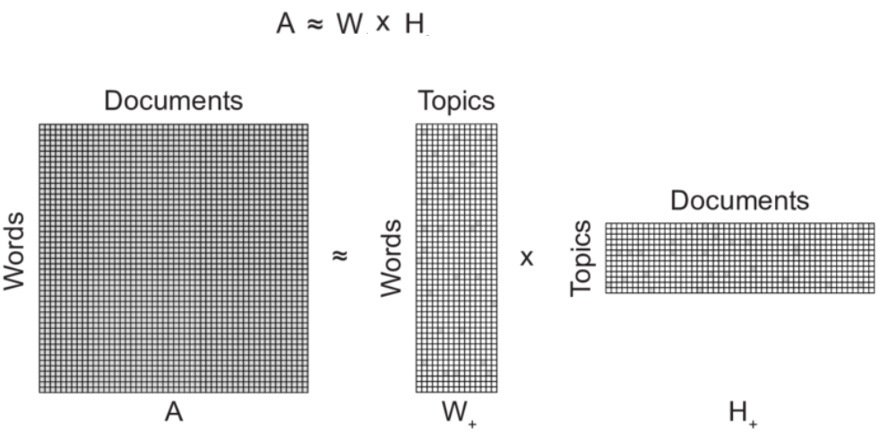

In [ ]:
# Let's apply NMF to a dataset containing some articles
import numpy as np
import pandas as pd

df = pd.read_csv('npr.csv')
df.head()

In [ ]:
# For NVM we first need to vectorize and TF-IDF our text data
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df = 0.9,
                        min_df = 2,
                        stop_words = 'english')

In [ ]:
# Applying TF-IDF Vect. to the articles
dtm = tfidf.fit_transform(df['Article'])

dtm

In [ ]:
# Creating the NMF model and fitting to the data
from sklearn.decomposition import NMF

nmf_model = NMF(n_components = 7,
                random_state = 42)

nmf_model.fit(dtm)

In [ ]:
# Getting the words with the highest coefficients for each topic
for i, topic in enumerate(nmf_model.components_):
  print(f"Top 15 words for topic #{i}")
  print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
  print("=============================")

In [ ]:
# Fitting the NMF model to the TF-IDF vectors to get topic coeffs. for each doc.
topic_results = nmf_model.transform(dtm)

In [ ]:
# Adding the topic column with the highest coefficient topic for each doc.
df['Topic'] = topic_results.argmax(axis = 1)

df.head(n = 20)

In [ ]:
# Adding a name for each topic
# Topic names were infered by checking the words with the highest coeffs. for each topic
# The topic names are user-defined and there is no right or wrong answer when it comes to naming
topic_dict = {0:'Health',1:'Election',2:"Legislation",3:"Politics",4:"Election",5:"Music",6:"Education"}
df['Topic Label'] = df['Topic'].map(topic_dict)

df.head(n = 20)

# NLP with Deep Learning

Now we'll try to use NN for NLP.

But first, we'll explore some Keras basics using the Iris dataset.

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
print(iris.feature_names)
print()
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

['setosa' 'versicolor' 'virginica']


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# Creating features and labels
X = iris.data
y = iris.target

In [ ]:
# One-hot encoding the labels
from keras.utils import to_categorical

y = to_categorical(y)

y.shape

(150, 3)

In [ ]:
# Performing the train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.33,
                                                    random_state = 42)

In [ ]:
# Normalizing the data
# Not needed but won't hurt the application
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
# Now to build a simple NN model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() # building a sequential NN model the contains:
model.add(Dense(units = 8, input_dim = 4, activation = 'relu')) # one dense hidden layer with 8 perceptrons, 4 input dimensions (since we have 4 features in the dataset), with ReLU activation
model.add(Dense(units = 8, activation = 'relu')) # another dense hidden layer same as before
model.add(Dense(units = 3, activation = 'softmax')) # last layer as output layer with 3 perceptrons (3 categories) and softmax activation

# Adding a loss function and optimizer to the model, specifying accuracy as the metric
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
# Getting a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 139 (556.00 Byte)
Trainable params: 139 (556.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# training the model on the training data for 50 epochs
model.fit(scaled_X_train,
          y_train,
          epochs = 100,
          verbose = 2)

Epoch 1/100
4/4 - 1s - loss: 1.1529 - accuracy: 0.1600 - 1s/epoch - 254ms/step
Epoch 2/100
4/4 - 0s - loss: 1.1463 - accuracy: 0.2700 - 13ms/epoch - 3ms/step
Epoch 3/100
4/4 - 0s - loss: 1.1410 - accuracy: 0.3400 - 12ms/epoch - 3ms/step
Epoch 4/100
4/4 - 0s - loss: 1.1365 - accuracy: 0.3500 - 10ms/epoch - 2ms/step
Epoch 5/100
4/4 - 0s - loss: 1.1314 - accuracy: 0.4000 - 10ms/epoch - 2ms/step
Epoch 6/100
4/4 - 0s - loss: 1.1267 - accuracy: 0.4500 - 11ms/epoch - 3ms/step
Epoch 7/100
4/4 - 0s - loss: 1.1221 - accuracy: 0.4700 - 12ms/epoch - 3ms/step
Epoch 8/100
4/4 - 0s - loss: 1.1178 - accuracy: 0.4700 - 10ms/epoch - 3ms/step
Epoch 9/100
4/4 - 0s - loss: 1.1134 - accuracy: 0.4800 - 12ms/epoch - 3ms/step
Epoch 10/100
4/4 - 0s - loss: 1.1092 - accuracy: 0.5000 - 12ms/epoch - 3ms/step
Epoch 11/100
4/4 - 0s - loss: 1.1051 - accuracy: 0.4800 - 12ms/epoch - 3ms/step
Epoch 12/100
4/4 - 0s - loss: 1.1009 - accuracy: 0.4800 - 11ms/epoch - 3ms/step
Epoch 13/100
4/4 - 0s - loss: 1.0969 - accuracy: 

In [ ]:
# Now let's test test our model on the test data
# the test data needs to be scaled (we already done that)
preds = model.predict(scaled_X_test).argmax(axis = 1)

preds

2/2 [==============================] - 0s 4ms/step


array([1, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [ ]:
# Turning y_test from one-hot encoded format back to standart format
y_test.argmax(axis = 1)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [ ]:
# Now to evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test.argmax(axis = 1), preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.87      0.93        15
           2       0.89      1.00      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [ ]:
print(confusion_matrix(y_test.argmax(axis = 1), preds))

[[19  0  0]
 [ 0 13  2]
 [ 0  0 16]]


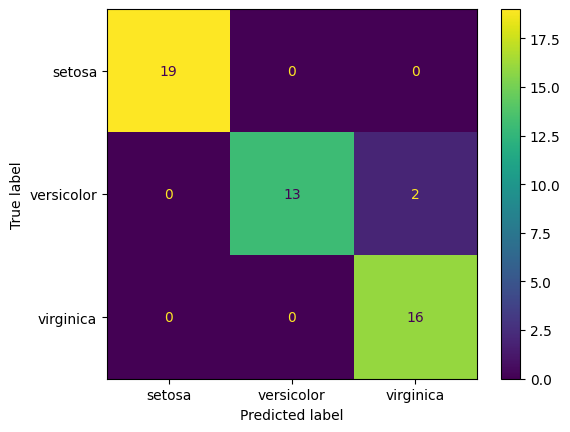

In [ ]:
conf_mat = ConfusionMatrixDisplay(confusion_matrix(y_test.argmax(axis = 1), preds), display_labels = iris.target_names)
conf_mat.plot();

In [ ]:
# Saving the model
model.save('first_model.keras')

In [ ]:
# Loading the model
from keras.models import load_model

new_model = load_model('first_model.keras')

In [ ]:
# Testing the loaded model
new_model.predict(scaled_X_test).argmax(axis = 1)

2/2 [==============================] - 0s 4ms/step


array([1, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

## Recurrent Neural Networks (RNNs) for NLP

A **recurrent neural network (RNN)** is a type of neural networks which uses sequential data or time series data. These deep learning algorithms are commonly used for ordinal or temporal problems, such as language translation, natural language processing, speech recognition, and image captioning; they are incorporated into popular applications such as Siri, voice search, and Google Translate.

**RNNs** are distinguished by their “memory” as they take information from prior inputs to influence the current input and output. While traditional deep neural networks assume that inputs and outputs are independent of each other, the output of recurrent neural networks depend on the prior elements within the sequence. While future events would also be helpful in determining the output of a given sequence, unidirectional recurrent neural networks cannot account for these events in their predictions. More info [here](https://www.geeksforgeeks.org/introduction-to-recurrent-neural-network/).

One of the main problems that RNNs face, is that the more we train the network the more it begins to forget earilier information and representation learned. The solution for this is the Long Short-Term Memory (LSTM) networks.

[**Long Short-Term Memory (LSTM) network**](https://www.analyticsvidhya.com/blog/2021/03/introduction-to-long-short-term-memory-lstm/) -  is a deep learning, sequential neural network that allows information to persist. It is a special type of Recurrent Neural Network which is capable of handling the vanishing gradient problem faced by RNNs.

For NLP, RNNs and LSTM can be used for **text generation**, and that what are we going to accomplish next.

In [ ]:
# file reading function
def read_file(filepath):
  with open(filepath, 'r') as f:
    str_text = f.read()
  return str_text

In [ ]:
# Tokenizing and cleaning the text
import spacy

# We want spacy only to get the tokens from the text, hence we'll disable everything except the tokenizer
nlp = spacy.load('en_core_web_sm', disable=['parser', 'tagger', 'ner','attribute_ruler', 'lemmatizer'])

In [ ]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x781d8770dea0>)]

In [ ]:
# Now we need to get rid of the punctiuations and new lines in our text so that the network doesn't overfit on them during training
def seperate_func(doc_text):
  return [token.text.lower() for token in nlp(doc_text) if token.text not in '\n\n \n\n\n!"-#$%&()--.*+,-/:;<=>?@[\\]^_`{|}~\t\n ']

In [ ]:
text = read_file('moby_dick_four_chapters.txt')

In [ ]:
tokens = seperate_func(text)

In [ ]:
len(tokens)

11338

For text generation, in our application, we will train the model on 25 words from each sentence, and let the network predict the 26th

25 words --> network predicts 26th

In [ ]:
# For that, we will create a list of sentences (sequences) of length 25 words
# where every next sentence is shifted one work to the right
train_len = 26

text_seqs = []

for i in range(train_len, len(tokens)):
  seq = tokens[i-train_len: i]
  text_seqs.append(seq)

In [ ]:
len(text_seqs)

11312

In [ ]:
print(' '.join(text_seqs[0]))

call me ishmael some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest me on


In [ ]:
print(' '.join(text_seqs[1]))

me ishmael some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest me on shore


In [ ]:
# Now for the training process
# In order for our network to understand the text data, we will use Keras' tokenizer
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

tokenizer.fit_on_texts(text_seqs)

In [ ]:
# Now every word in tokenized, and every number is the ID of the word
sequences = tokenizer.texts_to_sequences(text_seqs)

print(sequences[0])

[956, 14, 263, 51, 261, 408, 87, 219, 129, 111, 954, 260, 50, 43, 38, 314, 7, 23, 546, 3, 150, 259, 6, 2713, 14, 24]


In [ ]:
# We can access a dictionary of ID: word
tokenizer.index_word

{1: 'the',
 2: 'a',
 3: 'and',
 4: 'of',
 5: 'i',
 6: 'to',
 7: 'in',
 8: 'it',
 9: 'that',
 10: 'he',
 11: 'his',
 12: 'was',
 13: 'but',
 14: 'me',
 15: 'with',
 16: 'as',
 17: 'at',
 18: 'this',
 19: 'you',
 20: 'is',
 21: 'all',
 22: 'for',
 23: 'my',
 24: 'on',
 25: 'be',
 26: "'s",
 27: 'not',
 28: 'from',
 29: 'there',
 30: 'one',
 31: 'up',
 32: 'what',
 33: 'him',
 34: 'so',
 35: 'bed',
 36: 'now',
 37: 'about',
 38: 'no',
 39: 'into',
 40: 'by',
 41: 'were',
 42: 'out',
 43: 'or',
 44: 'harpooneer',
 45: 'had',
 46: 'then',
 47: 'have',
 48: 'an',
 49: 'upon',
 50: 'little',
 51: 'some',
 52: 'old',
 53: 'like',
 54: 'if',
 55: 'they',
 56: 'would',
 57: 'do',
 58: 'over',
 59: 'landlord',
 60: 'thought',
 61: 'room',
 62: 'when',
 63: 'could',
 64: "n't",
 65: 'night',
 66: 'here',
 67: 'head',
 68: 'such',
 69: 'which',
 70: 'man',
 71: 'did',
 72: 'sea',
 73: 'time',
 74: 'other',
 75: 'very',
 76: 'go',
 77: 'these',
 78: 'more',
 79: 'though',
 80: 'first',
 81: 'sort',


In [ ]:
# we can get the word counts
tokenizer.word_counts

OrderedDict([('call', 27),
             ('me', 2471),
             ('ishmael', 133),
             ('some', 758),
             ('years', 135),
             ('ago', 84),
             ('never', 449),
             ('mind', 164),
             ('how', 321),
             ('long', 374),
             ('precisely', 37),
             ('having', 142),
             ('little', 767),
             ('or', 950),
             ('no', 1003),
             ('money', 120),
             ('in', 5647),
             ('my', 1786),
             ('purse', 71),
             ('and', 9646),
             ('nothing', 281),
             ('particular', 152),
             ('to', 6497),
             ('interest', 24),
             ('on', 1716),
             ('shore', 26),
             ('i', 7150),
             ('thought', 676),
             ('would', 702),
             ('sail', 104),
             ('about', 1014),
             ('a', 10377),
             ('see', 416),
             ('the', 15540),
             ('watery', 26),
  

In [ ]:
# The size of our vocabulary
vocab_size = len(tokenizer.word_counts)
vocab_size

2718

In [ ]:
# Formatting our data with numpy
import numpy as np

sequences = np.array(sequences)
sequences

array([[ 956,   14,  263, ..., 2713,   14,   24],
       [  14,  263,   51, ...,   14,   24,  957],
       [ 263,   51,  261, ...,   24,  957,    5],
       ...,
       [ 952,   12,  166, ...,  262,   53,    2],
       [  12,  166, 2712, ...,   53,    2, 2718],
       [ 166, 2712,    3, ...,    2, 2718,   26]])

In [ ]:
# Now that we have the tokenized data, we need to split it into features and labels
# For each row (sentence) the features will be the first 25 tokens, and the 26th will be the label
X = sequences[:,:-1]
X

array([[ 956,   14,  263, ...,    6, 2713,   14],
       [  14,  263,   51, ..., 2713,   14,   24],
       [ 263,   51,  261, ...,   14,   24,  957],
       ...,
       [ 952,   12,  166, ...,   11,  262,   53],
       [  12,  166, 2712, ...,  262,   53,    2],
       [ 166, 2712,    3, ...,   53,    2, 2718]])

In [ ]:
y = sequences[:,-1]
y

array([  24,  957,    5, ...,    2, 2718,   26])

In [ ]:
# Now we need to one-hot encode the labels
from keras.utils import to_categorical
# Number of classes will be the size of the vocabulary (all the words) + 1 padding for Keras
# This +1 is to capture the length of the labels, since later we'll be using pad_sequences which uses a 0 as a placeholder for padding
y = to_categorical(y, num_classes = vocab_size + 1)

In [ ]:
# Getting the length of the sequence
seq_len = X.shape[1]
seq_len

25

In [ ]:
# Creating the model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

def create_model(vocabulary_size, seq_len):
  model = Sequential()

  model.add(Embedding(input_dim = vocabulary_size,
                      output_dim = seq_len,
                      input_length = seq_len))
  model.add(LSTM(units = 64,
                 return_sequences = True))
  model.add(LSTM(units = 64))
  model.add(Dense(units = 64,
                  activation = 'relu'))
  model.add(Dense(units = vocabulary_size,
                  activation = 'softmax'))

  model.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])
  model.summary()

  return model

In [ ]:
model = create_model(vocab_size+1, seq_len)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 25, 25)            67975     
                                                                 
 lstm_4 (LSTM)               (None, 25, 64)            23040     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 2719)              176735    
                                                                 
Total params: 304934 (1.16 MB)
Trainable params: 304934 (1.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Dummy training for the model (to see if everything works correctly)
from timeit import default_timer as timer

start_time = timer()

model.fit(X,
          y,
          batch_size = 128,
          epochs = 300,
          verbose = 1)

end_time = timer()
print(f"[INFO] Training time = {end_time - start_time:.4f} s.")

Epoch 1/300
89/89 [==============================] - 10s 65ms/step - loss: 6.9120 - accuracy: 0.0381
Epoch 2/300
89/89 [==============================] - 6s 69ms/step - loss: 6.3809 - accuracy: 0.0529
Epoch 3/300
89/89 [==============================] - 6s 69ms/step - loss: 6.3448 - accuracy: 0.0529
Epoch 4/300
89/89 [==============================] - 5s 59ms/step - loss: 6.2623 - accuracy: 0.0529
Epoch 5/300
89/89 [==============================] - 6s 72ms/step - loss: 6.1586 - accuracy: 0.0529
Epoch 6/300
89/89 [==============================] - 6s 63ms/step - loss: 6.1011 - accuracy: 0.0530
Epoch 7/300
89/89 [==============================] - 7s 77ms/step - loss: 6.0618 - accuracy: 0.0554
Epoch 8/300
89/89 [==============================] - 5s 62ms/step - loss: 5.9953 - accuracy: 0.0598
Epoch 9/300
89/89 [==============================] - 7s 74ms/step - loss: 5.9157 - accuracy: 0.0644
Epoch 10/300
89/89 [==============================] - 5s 56ms/step - loss: 5.8394 - accuracy: 0.067

In [ ]:
# Saving the model and the tokenizer (the tokenizer contains tons of useful info for our application)
from pickle import dump, load

model.save('moby_dick_model.keras')

dump(tokenizer, open('my_tokenizer', 'wb'))

In [ ]:
# Creating a function for text generation
from keras.preprocessing.sequence import pad_sequences

def generate_text(model, tokenizer, seq_len, seed_text, num_gen_words):
    '''
    INPUTS:
    model : model that was trained on text data
    tokenizer : tokenizer that was fit on text data
    seq_len : length of training sequence
    seed_text : raw string text to serve as the seed
    num_gen_words : number of words to be generated by model
    '''
    # Final Output
    output_text = []

    # Intial Seed Sequence
    input_text = seed_text

    # For every word to be generated
    for i in range(num_gen_words):

        # Take the input text string and encode it to a sequence
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]

        # Pad sequences to our trained rate (If the seed_text in shorted or longer than the default text size of 25)
        pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')

        # Predict Class Probabilities for each word
        pred_word_ind = model(pad_encoded)[0]
        pred_word_ind = np.argmax(pred_word_ind)

        # Grab the word based off its index
        pred_word = tokenizer.index_word[pred_word_ind]

        # Update the sequence of input text (shifting one over with the new word)
        input_text += ' ' + pred_word

        # Appending the predicted word to the final output
        output_text.append(pred_word)

    # Outputting the text and making it look like a sentence.
    return ' '.join(output_text)

In [ ]:
# Testing text generation on the first sequence
seed_text = text_seqs[0]
seed_text = ' '.join(seed_text)
seed_text

'call me ishmael some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest me on'

In [ ]:
# Generating text
generate_text(model = model,
              tokenizer = tokenizer,
              seq_len = seq_len,
              seed_text = seed_text,
              num_gen_words = 25)

'shore i thought i would sail now i may stumble and death make a dreaming and confounded you raised a straight wake for the own'

Our model's accuracy was pretty poor, since we did not train it for enough epochs and on enough text.

Naturally, model's performance can be imporved by training for longer, on more data, and maybe by increasing model's complexity by adding more layers.

In [ ]:
# Text generation on some dummy text
test_text = 'Hello Lama! My name is Waleed, and I wanted to pass to you some info regarding'
generate_text(model,tokenizer,seq_len,seed_text=test_text,num_gen_words=20)

'even i am took to the town and began creaking and limping with the matter he takes the seat over'

## Building a QA Chatbot

Here, we will try to create a QA chatbot that is based on the model presented in the [**End-To-End Memory Networks**](https://arxiv.org/pdf/1503.08895) paper.

Using this model, the chatbot will be able to answer questions based on stories fed to it.

The model will be trained on the **bAbI dataset**. It is essentially a dataset for testing text understanding and reasoning of models and for testing of end-to-end dialog systems

The Facebook bAbI dataset is a synthetic dataset of 20 toy question-answering tasks. Each task targets
a specific skill that a general reasoning agent would be expected to have, such as answering yes/no
questions or performing deduction over multiple sentences.
Each of the 20 tasks consists of 1,000 training examples and 1,000 test examples. The tasks are
generated from a simulation of characters and objects interacting in a small, closed world, which produces
ground text describing the scene and question/answer pairs. Supervision is provided in the form of
answers for each of the questions and the location of relevant sentences in the input required to answer
the question.

The dataset was presented in the paper "[**Towards AI-Complete Question Answering: A Set of Prerequisite Toy Tasks**](https://arxiv.org/pdf/1502.05698)"

The dataset contains sets of stories, questions and answers, for example:
- **Story**: Jane went to the store. Mike ran to the living room.
- **Question**: Is Mike in the store?
- **Answer**: No.

In [1]:
# Creating the train and test bAbI datasets
import pickle
import numpy as np
import pandas as pd

with open('train_qa.txt', 'rb') as f:
  train_data = pickle.load(f)

with open('test_qa.txt', 'rb') as f:
  test_data = pickle.load(f)

In [2]:
# the train data is a list of tuples
type(train_data)

list

In [3]:
len(train_data), len(test_data)

(10000, 1000)

In [4]:
# Example of single entry from the train data
# Each entry contains the story, a question and the right answer
print(train_data[0])

(['Mary', 'moved', 'to', 'the', 'bathroom', '.', 'Sandra', 'journeyed', 'to', 'the', 'bedroom', '.'], ['Is', 'Sandra', 'in', 'the', 'hallway', '?'], 'no')


In [5]:
print(test_data[0])

(['Mary', 'got', 'the', 'milk', 'there', '.', 'John', 'moved', 'to', 'the', 'bedroom', '.'], ['Is', 'John', 'in', 'the', 'kitchen', '?'], 'no')


In [6]:
# Creating the vocabulary
all_data = test_data + train_data

vocab = set()

for story, question, answer in all_data:
  vocab = vocab.union(set(story))
  vocab = vocab.union(set(question))

vocab.add('no')
vocab.add('yes')

In [7]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [8]:
# Same as before we need to add 1 to the length to account for keras padding in pad_sequences
vocab_len = len(vocab) + 1
vocab_len

38

In [9]:
# Also for padding purposes we need to get the longest story in our dataset
all_story_len = [len(data[0]) for data in all_data]

max_story_len = max(all_story_len)
print(max_story_len)

# And the longest question in the dataset
all_question_len = [len(data[1]) for data in all_data]

max_question_len = max(all_question_len)
print(max_question_len)

156
6


In [10]:
# Vectorizing, and turning the vocabulary into padded sequences
# First, tokenizing the vocabulary
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

tokenizer.word_index

{'is': 1,
 'left': 2,
 'bathroom': 3,
 'bedroom': 4,
 'garden': 5,
 'mary': 6,
 'yes': 7,
 'picked': 8,
 'sandra': 9,
 'kitchen': 10,
 'there': 11,
 'dropped': 12,
 'down': 13,
 'in': 14,
 '?': 15,
 'daniel': 16,
 'no': 17,
 'office': 18,
 'apple': 19,
 'up': 20,
 'grabbed': 21,
 'travelled': 22,
 'hallway': 23,
 'got': 24,
 'football': 25,
 '.': 26,
 'went': 27,
 'took': 28,
 'to': 29,
 'discarded': 30,
 'moved': 31,
 'journeyed': 32,
 'the': 33,
 'milk': 34,
 'put': 35,
 'john': 36,
 'back': 37}

In [11]:
# Second, creating seperate lists for stories, questions and answers
# train_story_text = []
# train_question_text = []
# train_answer_text = []

# for s, q, a in train_data:
#   train_story_text.append(s)
#   train_question_text.append(q)
#   train_answer_text.append(a)

In [12]:
# print(train_story_text[0])
# print(train_question_text[0])
# print(train_answer_text[0])

In [13]:
# Third, turning the lists into sequences
def vectorize_stories(data,
                      word_index=tokenizer.word_index,
                      max_story_len=max_story_len,
                      max_question_len=max_question_len):
  '''
  data: lists of data containing stories, questions and answers (bAbI dataset)
  word_index: word indexes created by the Keras tokenizer
  max_story_length: longest story in the data (for padding purposes)
  max_question_len: longest question in the data (for padding purposes)
  '''
  X = [] # Stories
  Xq = [] # Questions
  Y = [] # Answers
  # For each story, question, answer in the data
  for story, query, answer in data:
    x = [word_index[word.lower()] for word in story] # Get every word from each story and turn it into its index defined by the tokenizer
    xq = [word_index[word.lower()] for word in query] # Get every word from each question and turn it into its index defined by the tokenizer
    y = np.zeros(len(word_index) + 1) # numpy array of length = length of the word indexes +1 because 0 is reserved for keras padding
    y[word_index[answer]] = 1 # Set the indexes of the answers to 1 in the zeroes array

    # Appending the words above to the main lists
    X.append(x)
    Xq.append(xq)
    Y.append(y)

  # Returning padded versions of the stories and questions lists
  # Returning the answers lists as a numpy array
  return (pad_sequences(X, maxlen=max_story_len),
          pad_sequences(Xq, maxlen=max_question_len),
          np.array(Y))

In [14]:
# Creating train stories, questions, answers sequences
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [15]:
print(inputs_train)
print("============")
print(queries_train)
print("============")
print(answers_train)

[[ 0  0  0 ... 33  4 26]
 [ 0  0  0 ... 33 23 26]
 [ 0  0  0 ... 33  3 26]
 ...
 [ 0  0  0 ... 33  4 26]
 [ 0  0  0 ... 34 11 26]
 [ 0  0  0 ... 19 11 26]]
[[ 1  9 14 33 23 15]
 [ 1 16 14 33  3 15]
 [ 1 16 14 33 18 15]
 ...
 [ 1  9 14 33 23 15]
 [ 1  6 14 33 10 15]
 [ 1  6 14 33  4 15]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
# Creating test stories, questions, answers sequences
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [17]:
# We have 497 yes answers vs. 503 no answers
print(f"Index of word 'yes': {tokenizer.word_index['yes']}")
print(f"Index of word 'no': {tokenizer.word_index['no']}")
print(sum(answers_test))

Index of word 'yes': 7
Index of word 'no': 17
[  0.   0.   0.   0.   0.   0.   0. 497.   0.   0.   0.   0.   0.   0.
   0.   0.   0. 503.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]


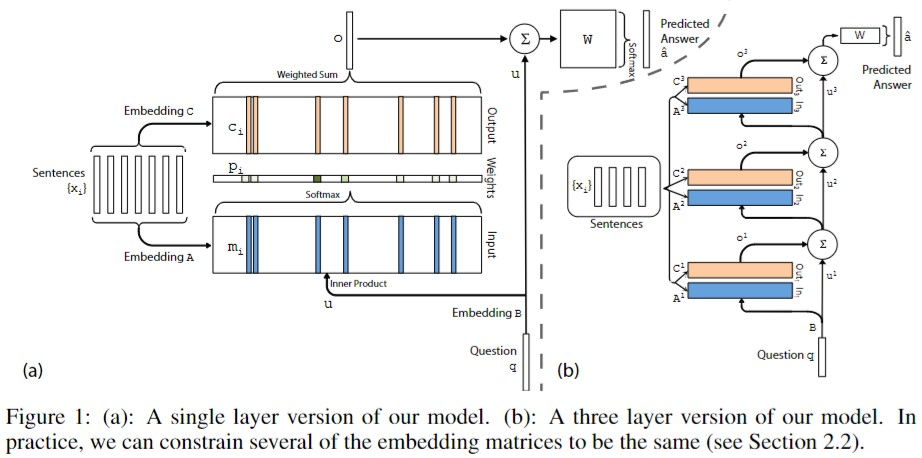

Now that we have our data ready, we will procede to building the network described in the paper.

The image above is the blueprint of the model taken from the research paper.

In [18]:
from keras.models import Sequential, Model
from keras.layers import Embedding, Input, Activation, Dense, Permute, Dropout, LSTM, add, dot, concatenate

**[keras.Input](https://keras.io/api/layers/core_layers/input/)** - is used to instantiate a keras tensor. In our model, since we have two inputs (stories and questions), we need to create placeholders for them.

**[keras.Embedding](https://keras.io/api/layers/core_layers/embedding/)** - Turns positive integers (indexes) into dense vectors of fixed size. Creates word embedding (vectors) using their tokenizer indexes.

**[keras.Dropout](https://keras.io/api/layers/regularization_layers/dropout/)** - Turns off random neurons during training, which makes other neurons learn better representations, which in turn helps reduce overfitting.

**[keras.dot](https://keras.io/api/layers/merging_layers/dot/)** - Computes element-wise dot product of two tensors.

**[keras.Activation](https://keras.io/api/layers/core_layers/activation/)** - Defines and applies an activation function to an output.

**[keras.add](https://keras.io/api/layers/merging_layers/add/)** - Performs elementwise addition operation.

**[keras.concatenate](https://keras.io/api/layers/merging_layers/concatenate/)** - Concatenates a list of inputs. It takes as input a list of tensors, all of the same shape except for the concatenation axis, and returns a single tensor that is the concatenation of all inputs.

**[keras.Permute](https://keras.io/api/layers/reshaping_layers/permute/)** - Permutes the dimensions of the input according to a given pattern.

**[keras.Model](https://keras.io/api/models/model/)** - A model grouping layers into an object with training/inference features.

In [19]:
# Creating input tensor placeholders using Input
# Shape = (max_story_len, batch_size)
input_sequence = Input((max_story_len,)) # the second dimension will be the batch dim.
question = Input((max_question_len,))

In [20]:
# Creating the input encoders M
input_encoder_M = Sequential()
input_encoder_M.add(Embedding(input_dim = vocab_len, # Size of the vocabulary + 1
                              output_dim = 64)) # Dimension of the dense embedding (64 defined in the paper)
input_encoder_M.add(Dropout(0.3))
# OUTPUT = (samples, story_maxlen, embedding_dim)

# Creating the input encoders C
input_encoder_C = Sequential()
input_encoder_C.add(Embedding(input_dim = vocab_len, # Size of the vocabulary + 1
                              output_dim = max_question_len)) # Dimension of the dense embedding
input_encoder_C.add(Dropout(0.3))
# OUTPUT = (samples, story_maxlen, question_len)

In [21]:
# Creating the question encoder
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_len, # Size of the vocabulary + 1
                              output_dim = 64, # Must match the dim of the encoder M
                              input_length = max_question_len)) # Defining the input length
question_encoder.add(Dropout(0.3))
# OUTPUT = (samples, question_maxlen, embedding_dim)

In [22]:
# Now that we have the encoders and the input placeholders
# We will encode our input tensors
input_encoded_M = input_encoder_M(input_sequence)
input_encoded_C = input_encoder_C(input_sequence)
question_encoded = question_encoder(question)

In [23]:
# Now we need to find matches by softmaxing the dot product between the encoded question and encoded input M
mat = dot([input_encoded_M, question_encoded], axes = (2,2)) # axes: Integer or tuple of integers, axis or axes along which to take the dot product.
mat = Activation('softmax')(mat)

In [24]:
# Next we need to add the matches to the encoded input C and get the responses
response = add([mat, input_encoded_C])
response = Permute((2,1))(response) # Rearranging the dimensions of the responses to be (query_maxlen, story_maxlen)

In [25]:
# Getting the final answer by concatenating the response and the initial encoded questions
answer = concatenate([response, question_encoded])
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [26]:
# Now we need to deduce the answer using a RNN with LSTM
answer = LSTM(32)(answer)
# Applying dropout reguralization
answer = Dropout(0.5)(answer)
# The final dense layer. OUTPUTS (samples, vocab_size)
answer = Dense(vocab_len)(answer)
# The output is a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

The expected output of the model is going to be an array of length = vocabulaty length, with a bunch of zeroes (or quantities close to zero) and ones that will appear at the indexes of the answers 'yes' and 'no'.

Keep in mind, the model CAN potentially output the answer as any other word in the vocabulary (for e.g. 'sarah'), but generally the highest answers probabilities will hopefully be the probabilities for 'yes' and 'no'

We will be using the RMSProp optimizer. Documentation [here](https://keras.io/api/optimizers/rmsprop/).

More info on RMSProp [here](https://deepai.org/machine-learning-glossary-and-terms/rmsprop#:~:text=RMSProp%2C%20which%20stands%20for%20Root,in%20training%20deep%20neural%20networks.).

In [27]:
# Building the final model ([X,Xq], Y)
model = Model([input_sequence, question], answer)

# Compiling the model with RMSProp optimizer and CrossEntropy loss function
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [28]:
# Getting a summary of the final model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 156)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 sequential (Sequential)     (None, None, 64)             2432      ['input_1[0][0]']             
                                                                                                  
 sequential_2 (Sequential)   (None, 6, 64)                2432      ['input_2[0][0]']             
                                                                                              

In [29]:
# Fitting the model to the training data
results = model.fit(x = [inputs_train, queries_train],
                    y = answers_train,
                    batch_size = 32,
                    epochs = 100,
                    validation_data = ([inputs_test, queries_test], answers_test))

Epoch 1/100
313/313 [==============================] - 11s 12ms/step - loss: 0.9329 - accuracy: 0.4903 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 2/100
313/313 [==============================] - 2s 6ms/step - loss: 0.7050 - accuracy: 0.5055 - val_loss: 0.6936 - val_accuracy: 0.5030
Epoch 3/100
313/313 [==============================] - 2s 6ms/step - loss: 0.6983 - accuracy: 0.4948 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 4/100
313/313 [==============================] - 2s 6ms/step - loss: 0.6958 - accuracy: 0.5068 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 5/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6960 - accuracy: 0.4959 - val_loss: 0.6942 - val_accuracy: 0.4970
Epoch 6/100
313/313 [==============================] - 2s 6ms/step - loss: 0.6956 - accuracy: 0.4941 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 7/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6962 - accuracy: 0.4866 - val_loss: 0.6942 - val_accuracy: 0.49

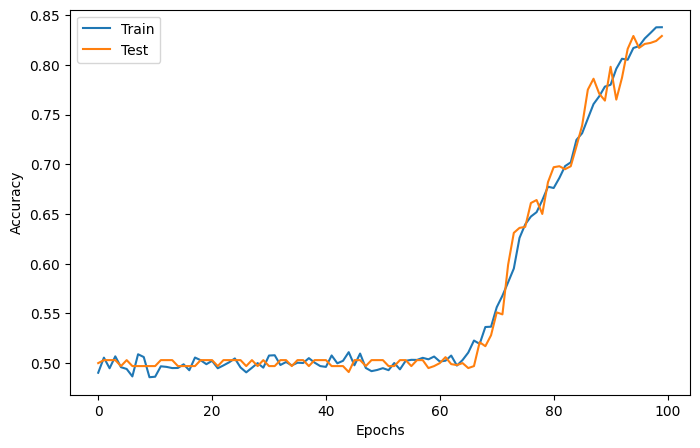

In [41]:
# Plotting model's train and validation accuracy
import matplotlib.pyplot as plt
plt.figure(figsize = (8,5))
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'upper left');

As we can clearly see, the model starts learning at around the 65th epoch, before that it operated on randomly guessing the answer.

In [42]:
# Saving the model
model.save('babi_model.keras')

In [43]:
# Evaluating the model on the test data
# We should not pass the answers since we want to evaluate the model
eval_results = model.predict([inputs_test, queries_test])

32/32 [==============================] - 1s 3ms/step


In [44]:
# This will output a probability for every single word in the vocabulary for every test story, question pairs
eval_results

array([[1.1372571e-08, 9.3592654e-09, 1.2707775e-08, ..., 1.0772222e-08,
        1.3447581e-08, 9.2175219e-09],
       [1.7123430e-08, 1.4733923e-08, 1.9568333e-08, ..., 1.6996204e-08,
        1.8745459e-08, 1.6058875e-08],
       [8.4480419e-08, 7.3581340e-08, 7.7213983e-08, ..., 7.1325232e-08,
        8.6859735e-08, 8.5327038e-08],
       ...,
       [3.9305242e-08, 3.3497429e-08, 4.0466077e-08, ..., 3.7702204e-08,
        3.8825689e-08, 3.1529922e-08],
       [5.2082651e-08, 3.9507235e-08, 4.0899245e-08, ..., 4.0911733e-08,
        5.4354530e-08, 5.1338112e-08],
       [1.4276155e-07, 1.1661375e-07, 1.1730060e-07, ..., 1.2298484e-07,
        1.4609465e-07, 1.3598985e-07]], dtype=float32)

In [48]:
# Thousand test stories, 37 + 1 vocabulary size
eval_results.shape

(1000, 38)

In [64]:
# Getting the index with maximum probability in the vocabulary
max_pred = eval_results[0].argmax(axis = 0)
max_pred

17

In [109]:
test_data[0]

(['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'kitchen', '?'],
 'no')

In [65]:
# Saving the answers indexes into variables
no_index = tokenizer.word_index['no']
yes_index = tokenizer.word_index['yes']

In [129]:
# Comparing the max index of the result with the indexes of the answers
if max_pred == no_index:
  print('No')
else:
  print("Yes")

# The model was 99.6% sure that the correct answer is 'no'
print()
print(f"Correct answer probability is: {eval_results[0][max_pred] * 100:.2f}%")

No

Correct answer probability is: 99.68%


It seems we got the correct answer regarding the first story and question that also had 'no' as the answer

Now we're going to test our model on some new, neven before seen stories and questions.

Keep in mind that since the model is trained on a limited vocabulay, we can only construct the stories and questions using words from said vocabulary.

In [77]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [99]:
# Creating a custom story and question
# We need to leave a space before and after each punctiuation, becuase they're seen as seperate tokens by the vocabulary
my_story = 'John left the kitchen . Sandra dropped the football in the garden .'
my_question = 'Is the football in the garden ?'

# Packing our custom data into a single list of single tuple (What the models expects)
# We need to pass each sentence as a list
# The predicted answer (logically) is 'no'
my_data = [(my_story.split(),
            my_question.split(),
            'yes')]

In [100]:
# Now we have to vectorize the data using the vectorizer function we created above
my_story, my_question, my_answer = vectorize_stories(my_data)

In [101]:
my_story

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 36,
         2, 33, 10, 26,  9, 12, 33, 25, 14, 33,  5, 26]], dtype=int32)

In [102]:
# Using the model to predict the correct answer of story and question
custom_pred_res = model.predict(([my_story, my_question]))

1/1 [==============================] - 0s 29ms/step


In [103]:
custom_max_pred = custom_pred_res.argmax(axis = 1)
custom_max_pred

array([7])

In [104]:
# As we can see the model predicted 'yes' the same as the logical answer to the question
if custom_max_pred == no_index:
  print('No')
else:
  print("Yes")

Yes


In [105]:
# The correct answer probability
custom_pred_res[0][custom_max_pred].item() * 100

97.08059430122375